# Data Aggregation & PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eng_train = pd.read_csv('E:\Preet\Internship Raj Vijtech\Aircraft data & analysis\CSV data files\Train_data_csv.csv')

In [6]:
#Group data by Unit No and get last 5 samples for each Unit
eng_last5 = eng_train.groupby('Unit No.').tail(5)

In [7]:
eng_last5

,Unit No.,Time in Cycles,Op.Setting 1,Op.Setting 2,Op.Setting 3,S1,S2,S3,S4,S5,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,-0.0363
187,1,188,-0.0067,0.0003,100,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100,38.51,22.9588,NaN
188,1,189,-0.0006,0.0002,100,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100,38.48,23.1127,NaN
189,1,190,-0.0027,0.0001,100,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100,38.49,23.0675,NaN
190,1,191,0.0000,-0.0004,100,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100,38.45,23.1295,NaN
191,1,192,0.0009,0.0000,100,518.67,643.54,1601.41,1427.20,14.62,...,2388.32,8110.93,8.5113,0.03,396,2388,100,38.48,22.9649,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735,NaN
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594,NaN
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333,NaN
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640,NaN


In [8]:
eng_last5.to_excel('Last5.xlsx')

In [26]:
#Group the data again same as before and get last 10 samples
eng_last10 = eng_train.groupby('Unit No.').rolling(5).mean()

In [27]:
eng_last10

Time in Cycles  Op.Setting 1  Op.Setting 2  Op.Setting 3  \
Unit No.                                                                   
1        0                 NaN           NaN           NaN           NaN   
         1                 NaN           NaN           NaN           NaN   
         2                 NaN           NaN           NaN           NaN   
         3                 NaN           NaN           NaN           NaN   
         4                 3.0      -0.00086      -0.00012         100.0   
...                        ...           ...           ...           ...   
100      20626           194.0      -0.00054       0.00004         100.0   
         20627           195.0      -0.00068      -0.00008         100.0   
         20628           196.0      -0.00058      -0.00012         100.0   
         20629           197.0      -0.00058      -0.00012         100.0   
         20630           198.0      -0.00118      -0.00020         100.0   

                    S1       S2        S3        S4     S5     S6  ...  \
Unit No.                                                           ...   
1        0         NaN      NaN       NaN       NaN    NaN    NaN  ...   
         1         NaN      NaN       NaN       NaN    NaN    NaN  ...   
         2         NaN      NaN       NaN       NaN    NaN    NaN  ...   
         3         NaN      NaN       NaN       NaN    NaN    NaN  ...   
         4      518.67  642.208  1587.030  1403.206  14.62  21.61  ...   
...                ...      ...       ...       ...    ...    ...  ...   
100      20626  518.67  643.448  1599.270  1427.270  14.62  21.61  ...   
         20627  518.67  643.450  1599.924  1430.090  14.62  21.61  ...   
         20628  518.67  643.516  1600.454  1429.940  14.62  21.61  ...   
         20629  518.67  643.418  1602.048  1429.764  14.62  21.61  ...   
         20630  518.67  643.506  1602.116  1429.812  14.62  21.61  ...   

                    S12       S13       S14      S15   S16    S17     S18  \
Unit No.                                                                    
1        0          NaN       NaN       NaN      NaN   NaN    NaN     NaN   
         1          NaN       NaN       NaN      NaN   NaN    NaN     NaN   
         2          NaN       NaN       NaN      NaN   NaN    NaN     NaN   
         3          NaN       NaN       NaN      NaN   NaN    NaN     NaN   
         4      522.282  2388.048  8134.194  8.41334  0.03  391.8  2388.0   
...                 ...       ...       ...      ...   ...    ...     ...   
100      20626  519.890  2388.232  8141.130  8.52012  0.03  395.8  2388.0   
         20627  519.708  2388.234  8139.738  8.52506  0.03  395.4  2388.0   
         20628  519.688  2388.244  8139.544  8.52950  0.03  395.6  2388.0   
         20629  519.712  2388.246  8139.468  8.53298  0.03  395.8  2388.0   
         20630  519.630  2388.242  8138.354  8.52332  0.03  396.2  2388.0   

                  S19     S20       S21  
Unit No.                                 
1        0        NaN     NaN       NaN  
         1        NaN     NaN       NaN  
         2        NaN     NaN       NaN  
         3        NaN     NaN       NaN  
         4      100.0  38.958  23.39302  
...               ...     ...       ...  
100      20626  100.0  38.408  23.07964  
         20627  100.0  38.356  23.09612  
         20628  100.0  38.350  23.07818  
         20629  100.0  38.332  23.06450  
         20630  100.0  38.378  23.03648  

[20631 rows x 25 columns]

In [12]:
eng_last10.to_excel('Last10.xlsx')

# PCA on Complete Data

In [3]:
df = eng_train.groupby('Unit No.').tail(20630)
df

,Unit No.,Time in Cycles,Op.Setting 1,Op.Setting 2,Op.Setting 3,S1,S2,S3,S4,S5,...,S13,S14,S15,S16,S17,S18,S19,S20,S21,Label
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,0
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,0
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735,1
20627,100,197,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594,1
20628,100,198,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333,1
20629,100,199,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640,1


In [4]:
#Drop all columns other than Op.setting 1-3 & S1-S21
df = df.drop('Time in Cycles', axis = 1)
df = df.drop(['Unit No.','Label'], axis = 1)

In [5]:
df1 = df.columns

In [6]:
#Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [7]:
trans = MinMaxScaler()              
data = trans.fit_transform(df)     #Scale the data using Minmax Scalar
scaled_data = pd.DataFrame(data)

In [8]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.477011,0.250000,0.0,0.0,0.686747,0.587312,0.782917,0.0,1.0,0.254428,...,0.170576,0.558824,0.194344,0.656791,0.0,0.750000,0.0,0.0,0.271318,0.109500
20627,0.408046,0.083333,0.0,0.0,0.701807,0.729453,0.866475,0.0,1.0,0.162641,...,0.211087,0.500000,0.188668,0.727203,0.0,0.583333,0.0,0.0,0.124031,0.366197
20628,0.522989,0.500000,0.0,0.0,0.665663,0.684979,0.775321,0.0,1.0,0.175523,...,0.281450,0.529412,0.212148,0.922278,0.0,0.833333,0.0,0.0,0.232558,0.053991
20629,0.436782,0.750000,0.0,0.0,0.608434,0.746021,0.747468,0.0,1.0,0.133655,...,0.208955,0.514706,0.203065,0.823394,0.0,0.583333,0.0,0.0,0.116279,0.234466


In [9]:
#Call PCA & fit the scaled data
pca = PCA()                  
df3 = pca.fit_transform(scaled_data)   

In [10]:
df4 = pca.components_   #Loading score matrix 

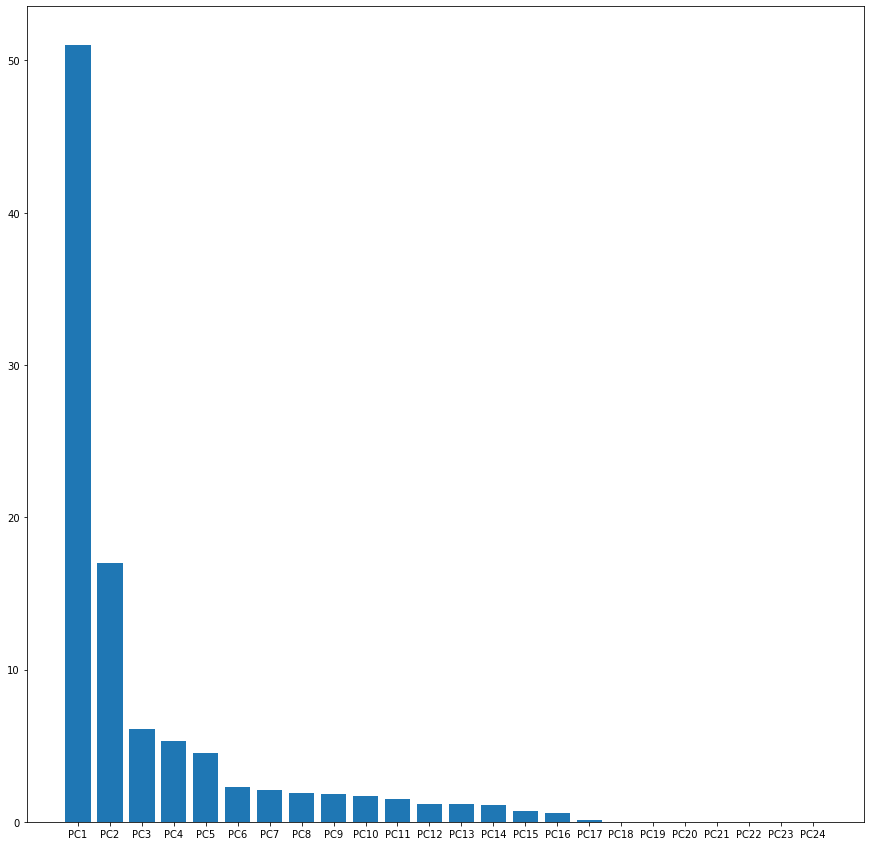

In [20]:
# PCA code
var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
loading_scores = pd.Series(pca.components_[0], index = df1)           #converting loading score in pandas series
sorted_scores = loading_scores.abs().sort_values(ascending = False)   #Sort loading score in descending order
labels = ['PC' + str(x) for x in range(1, len(var)+1) ]               #Define labels for X axis(As index starts from 0 by default)
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(var)+1), height = var, tick_label = labels)
plt.show()
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]   
most_important_names = [df1[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
df2 = pd.DataFrame(dic.items())                                        #Highest contributing feature for each PC

In [26]:
df2

,0,1
0,PC1,S11
1,PC2,Op.Setting 2
2,PC3,S14
3,PC4,S6
4,PC5,Op.Setting 1
5,PC6,S2
6,PC7,S3
7,PC8,S21
8,PC9,S17
9,PC10,S15


# PCA on Aggregated data (Last 5)

In [3]:
# Load the aggregated data file of last 5 samples
eng_train = pd.read_excel('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\last-n_data.xlsx', sheet_name = 'Last5')

In [4]:
eng_train = eng_train.drop('Time in Cycles',axis = 1)
eng_train = eng_train.drop('Unit No.', axis = 1)
eng_train

,Op.Setting 1,Op.Setting 2,Op.Setting 3,S1,S2,S3,S4,S5,S6,S7,...,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21
0,-0.0067,0.0003,100,518.67,643.75,1602.38,1422.78,14.62,21.61,551.94,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100,38.51,22.9588
1,-0.0006,0.0002,100,518.67,644.18,1596.17,1428.01,14.62,21.61,550.70,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100,38.48,23.1127
2,-0.0027,0.0001,100,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100,38.49,23.0675
3,0.0000,-0.0004,100,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100,38.45,23.1295
4,0.0009,0.0000,100,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,...,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100,38.48,22.9649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.0004,-0.0003,100,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100,38.49,22.9735
496,-0.0016,-0.0005,100,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100,38.30,23.1594
497,0.0004,0.0000,100,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100,38.44,22.9333
498,-0.0011,0.0003,100,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100,38.29,23.0640


In [5]:
df1 = eng_train.columns
df1

Index(['Op.Setting 1', 'Op.Setting 2', 'Op.Setting 3', 'S1', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15',
       'S16', 'S17', 'S18', 'S19', 'S20', 'S21'],
      dtype='object')

In [8]:
trans = MinMaxScaler()
data = trans.fit_transform(eng_train)
scaled_data = pd.DataFrame(data)

In [9]:
pca = PCA()
pca.fit_transform(scaled_data)

array([[-2.78504143e-01, -2.97043901e-01,  1.10339680e-01, ...,
         6.26954532e-34, -9.23610012e-36,  1.37836798e-50],
       [-4.70167215e-01, -2.78599606e-01,  7.01665579e-02, ...,
         2.31924925e-35,  5.06656611e-36,  1.64299871e-50],
       [-3.80738128e-01, -1.18654678e-01,  6.75795798e-02, ...,
        -2.19615663e-33, -8.07412137e-35, -3.80588706e-50],
       ...,
       [-1.52046084e-01,  3.74522957e-03, -1.85075603e-01, ...,
        -1.59947440e-34,  2.09506090e-36,  1.32420350e-51],
       [-2.30684231e-01, -2.36741698e-01, -2.89297604e-01, ...,
         1.58782772e-35,  2.25407942e-36, -1.13966253e-51],
       [-3.81742075e-01,  4.32118115e-01, -1.22749294e-01, ...,
         1.14550702e-34,  1.10485560e-36,  4.54926421e-52]])

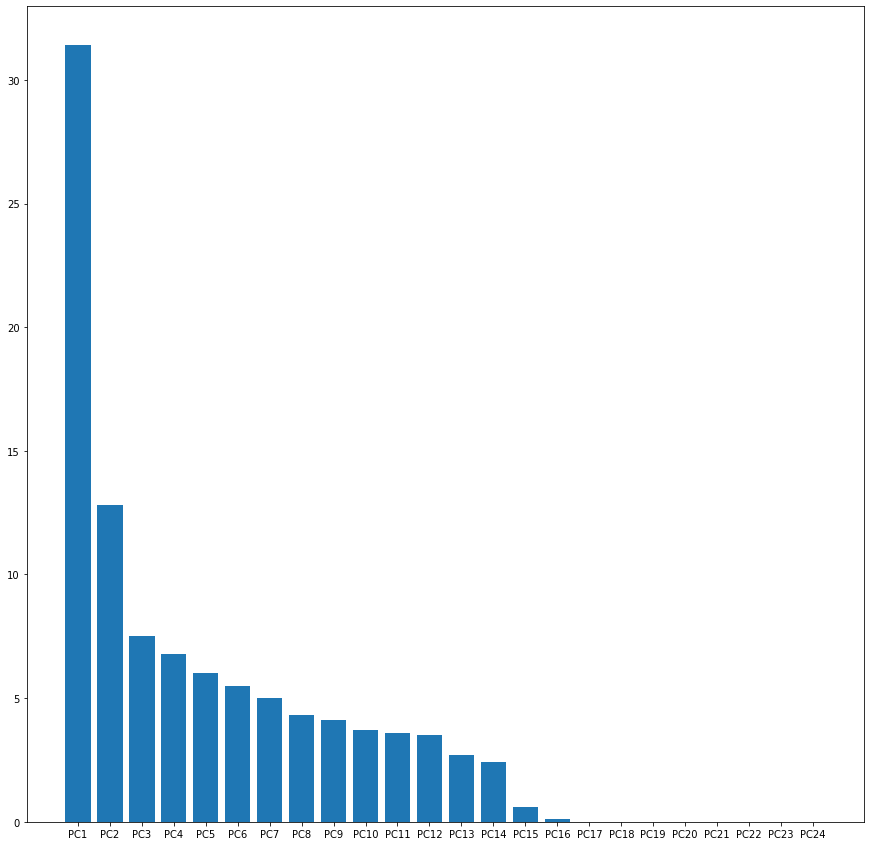

In [19]:
var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
loading_scores = pd.Series(np.amax(pca.components_, axis=0), index = df1)
sorted_scores = loading_scores.abs().sort_values(ascending = False)
labels = ['PC' + str(x) for x in range(1, len(var)+1) ]
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(var)+1), height = var, tick_label = labels)
plt.show()
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [df1[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
df2 = pd.DataFrame(dic.items())


In [21]:
comp = pd.DataFrame(pca.components_)

In [23]:
comp.to_excel('output1.xlsx')

# PCA on aggregated data (Last 10)

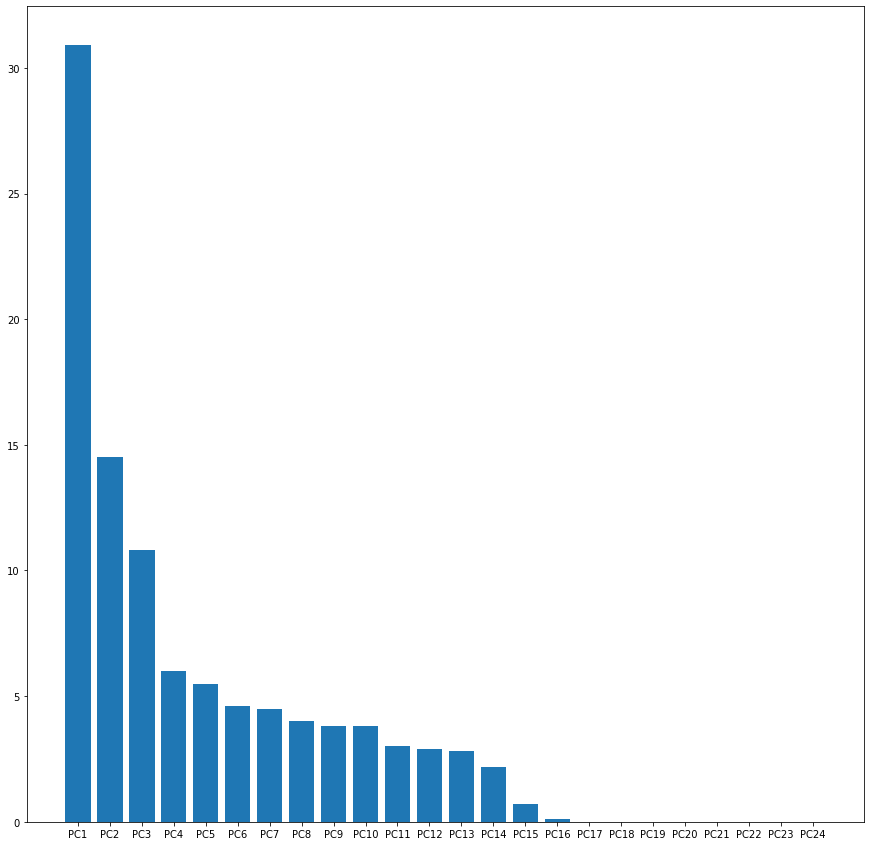

In [175]:
ng_train = pd.read_excel('D:\Preet\Internship Raj Vijtech\Aircraft data & analysis\last-n_data.xlsx', sheet_name = 'Last10')
eng_train = eng_train.drop('Time in Cycles',axis = 1)
eng_train = eng_train.drop('Unit No.', axis = 1)
df1 = eng_train.columns
trans = MinMaxScaler()
data = trans.fit_transform(eng_train)
scaled_data = pd.DataFrame(data)
pca = PCA()
pca.fit_transform(scaled_data)
var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
loading_scores = pd.Series(pca.components_[0], index = df1)
sorted_scores = loading_scores.abs().sort_values(ascending = False)
labels = ['PC' + str(x) for x in range(1, len(var)+1) ]
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(var)+1), height = var, tick_label = labels)
plt.show()
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [df1[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df2 = pd.DataFrame(dic.items())

In [177]:
sorted_scores

S14             6.054646e-01
S9              5.807597e-01
S13             2.701897e-01
S12             2.657194e-01
S8              2.618561e-01
S7              1.949810e-01
S11             1.181959e-01
S3              9.576733e-02
S17             8.935352e-02
S4              7.704687e-02
Op.Setting 2    5.686676e-02
S15             3.861654e-02
S21             3.709917e-02
S20             3.686722e-02
S2              3.663289e-02
Op.Setting 1    8.411787e-03
S1              1.110223e-16
Op.Setting 3    1.110223e-16
S6              4.235165e-22
S10             4.038968e-28
S5              0.000000e+00
S16             0.000000e+00
S18             0.000000e+00
S19             0.000000e+00
dtype: float64

In [178]:
comp = pd.DataFrame(pca.components_)
comp.to_excel('output1.xlsx')

In [179]:
df2

,0,1
0,PC0,S14
1,PC1,Op.Setting 2
2,PC2,S21
3,PC3,S21
4,PC4,S2
5,PC5,S4
6,PC6,Op.Setting 1
7,PC7,S3
8,PC8,S17
9,PC9,S15
